In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
from pandas import DataFrame, Series
from numpy import nan as NA

In [107]:
def summ(x):
    percentile=np.percentile(x,[2.5,25,50,75,97.5]).tolist()
    summ=[np.mean(x),np.std(x)]
    summ.extend(percentile)
    summ=DataFrame(summ,index=["mean","sd","2.5%","25%","50%","75%","97.5%"],columns=["info"]).T
    return summ

In [77]:
y=Series([89,88,97,94,84,77,92,79,81,87,87,85,87,92,89,84,79,81,80,88],name="yields of penicillin")
block=Series([1,1,1,1,2,2,2,2,3,3,3,3,4,4,4,4,5,5,5,5],name="Block")
treatment=Series(["A","B","C","D","A","B","C","D","A","B","C","D",
                  "A","B","C","D","A","B","C","D"],name="Treatment")
cons=Series(np.ones(len(y)),name="Constant")
X=pd.concat([cons,pd.get_dummies(block),pd.get_dummies(treatment)],axis=1)

In [78]:
X

,Constant,1,2,3,4,5,A,B,C,D
0,1,1,0,0,0,0,1,0,0,0
1,1,1,0,0,0,0,0,1,0,0
2,1,1,0,0,0,0,0,0,1,0
3,1,1,0,0,0,0,0,0,0,1
4,1,0,1,0,0,0,1,0,0,0
5,1,0,1,0,0,0,0,1,0,0
6,1,0,1,0,0,0,0,0,1,0
7,1,0,1,0,0,0,0,0,0,1
8,1,0,0,1,0,0,1,0,0,0
9,1,0,0,1,0,0,0,1,0,0


In [91]:
n=len(X)
k=len(X.T)
Q=np.linalg.qr(X)[0]
R=np.linalg.qr(X)[1]
V_beta=np.dot(np.linalg.inv(R),np.linalg.inv(R).T)
beta_hat=np.dot(np.dot(np.linalg.inv(R),Q.T),y)
s2=1./(n-k)*np.dot((y-np.dot(X,beta_hat)),(y-np.dot(X,beta_hat)))

In [93]:
sigma2=[]
beta=[]
for i in range(1000):
    sigma2.append((n-k)*s2/sp.stats.chi.rvs(df=n-k))
    beta.append(np.random.multivariate_normal(beta_hat,V_beta*sigma2[i]))

C:\Users\User\Anaconda\lib\site-packages\IPython\kernel\__main__.py:5: RuntimeWarning: covariance is not positive-semidefinite.


In [105]:
y_rep=[]
for i in range(1000):
    y_rep.append(np.random.multivariate_normal(np.dot(X,beta_hat),np.identity(20)*sigma2[0]))
y_rep=DataFrame(y_rep)

In [118]:
for i in range(10):
    print summ(DataFrame(beta).ix[:,i])

              mean            sd          2.5%           25%           50%  \
info -6.581424e+15  3.531355e+16 -7.516628e+16 -3.017138e+16 -5.916226e+15   

               75%         97.5%  
info  1.765403e+16  6.177906e+16  
              mean            sd          2.5%           25%           50%  \
info  7.206372e+14  2.565763e+16 -4.890718e+16 -1.774344e+16  8.002013e+14   

               75%         97.5%  
info  1.845810e+16  4.864698e+16  
              mean            sd          2.5%           25%           50%  \
info  7.206372e+14  2.565763e+16 -4.890718e+16 -1.774344e+16  8.002019e+14   

               75%         97.5%  
info  1.845810e+16  4.864698e+16  
              mean            sd          2.5%           25%           50%  \
info  7.206372e+14  2.565763e+16 -4.890718e+16 -1.774344e+16  8.002025e+14   

               75%         97.5%  
info  1.845810e+16  4.864698e+16  
              mean            sd          2.5%           25%           50%  \
info  7.206372

In [109]:
for i in range(20):
    print summ(y_rep.ix[:,i])

           mean        sd      2.5%        25%        50%        75%  \
info  67.447757  38.78961 -7.239381  41.377043  67.162665  93.901901   

           97.5%  
info  142.034297  
           mean         sd      2.5%        25%        50%         75%  \
info  78.968311  38.588233  1.256197  53.641844  81.245212  105.465788   

           97.5%  
info  149.547758  
           mean         sd      2.5%        25%        50%        75%  \
info  72.093346  38.759904 -3.571391  45.426109  73.157785  98.188952   

           97.5%  
info  149.610791  
           mean         sd       2.5%        25%        50%        75%  \
info  65.155453  40.416501 -12.051463  38.378062  64.930511  91.183214   

           97.5%  
info  147.919466  
           mean         sd      2.5%        25%        50%        75%  \
info  70.574531  37.426777  0.645364  45.812267  68.938071  94.484679   

           97.5%  
info  144.482943  
           mean        sd     2.5%        25%        50%         75%  \
i

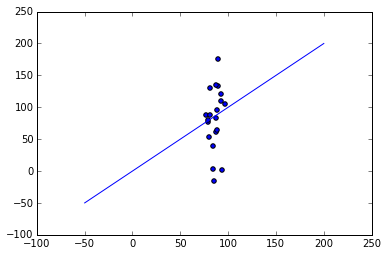

In [117]:
plt.scatter(y,y_rep.ix[0,:])
plt.plot([-50,200],[-50,200])